In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "house-prices-advanced-regression-techniques"

In [2]:
library(readr)
df_train=read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_train
price_which=which(colnames(df_train)=='SalePrice')
id_which=which(colnames(df_train)=='Id')


Rows: 1460 Columns: 81

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900



### Descriptive and Inferential Statistics

Provide univariate descriptive statistics and appropriate plots for the training data set.  Provide a scatterplot matrix for at least two of the independent variables and the dependent variable. Derive a correlation matrix for any three quantitative variables in the dataset.  Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval.  Discuss the meaning of your analysis.  Would you be worried about familywise error? Why or why not?



In [3]:
summary(df_train)

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

Above is the initial, high-level summary of the training dataset from Kaggle. Later, I will transform character variables to factor and also account for missing data.

### Univariate statistics and plots

Selecting 4 popular variables in describing houses for sale: lot area (LotArea), above ground living area square feet (GrLivArea), total rooms above grade (TotRmsAbvGrd), and year built (YearBuilt) along with the dependent variable sale price (SalePrice).

Lot area shows a minimum of 1300 square feet and over 200,000 square feet with a mean of 10,517. The histogram shows a near normal distribution when applying log to the lot area values.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1300    7554    9478   10517   11602  215245 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



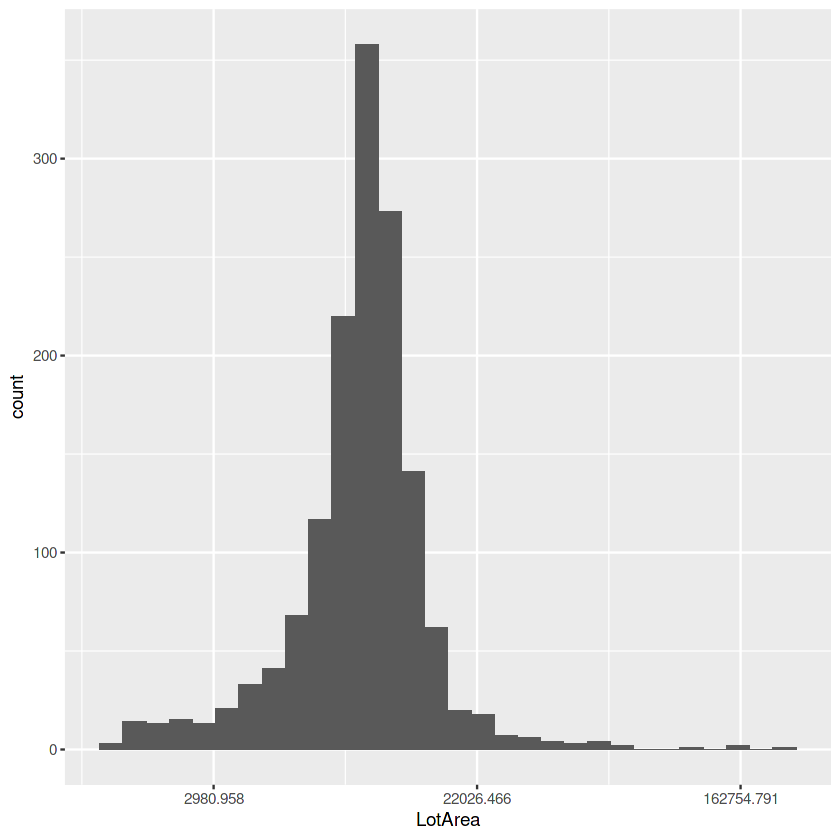

In [4]:
summary(df_train$LotArea)
# Lot Area
ggplot(df_train, aes(LotArea)) +
  geom_histogram() +
  scale_x_continuous(trans="log")


The above ground living area as measured in square feet indicates a minimum of 334 and a maximum of 5,642 and mean of 1,515. The histogram also shows a near normal distribution once applying log to the ground living area values.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1130    1464    1515    1777    5642 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



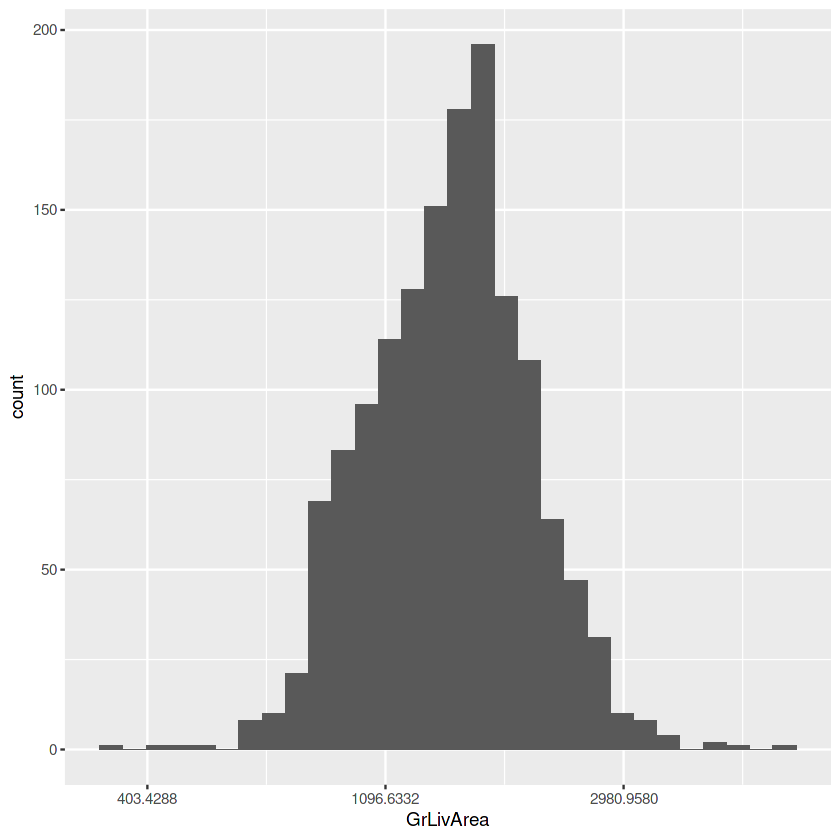

In [5]:
summary(df_train$GrLivArea)
# Above ground living area
ggplot(df_train, aes(GrLivArea)) +
  geom_histogram() +
  scale_x_continuous(trans="log")

Total rooms above grade indicates a minimum of 2 and a maximum of 14 (must be nice) along with a mean of 6.5. The histogram shows a near normal distribution, interestingly the right skew of this plot doesn't match the left skew of the total living area plot above.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   6.518   7.000  14.000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



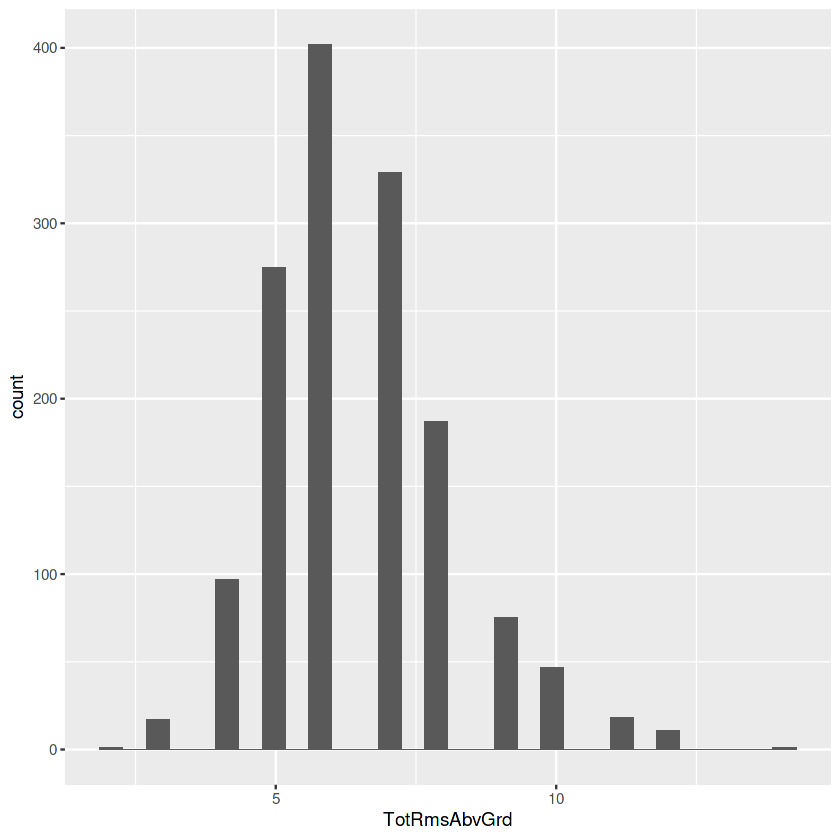

In [6]:
summary(df_train$TotRmsAbvGrd)
# Bedroom Above Ground
ggplot(df_train, aes(TotRmsAbvGrd)) +
  geom_histogram()

Year built is numerical and can be considered quantitative. With that in mind, the minimum year is 1872 with a maximum of 2010. The median year is 1973. The histogram show a spike in the 1960s and 1970s, followed by a dip in the 1980s and then another large spike in the 1990s and 2000s. Not expecting a normal distribution given the nature of the year variable.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1872    1954    1973    1971    2000    2010 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



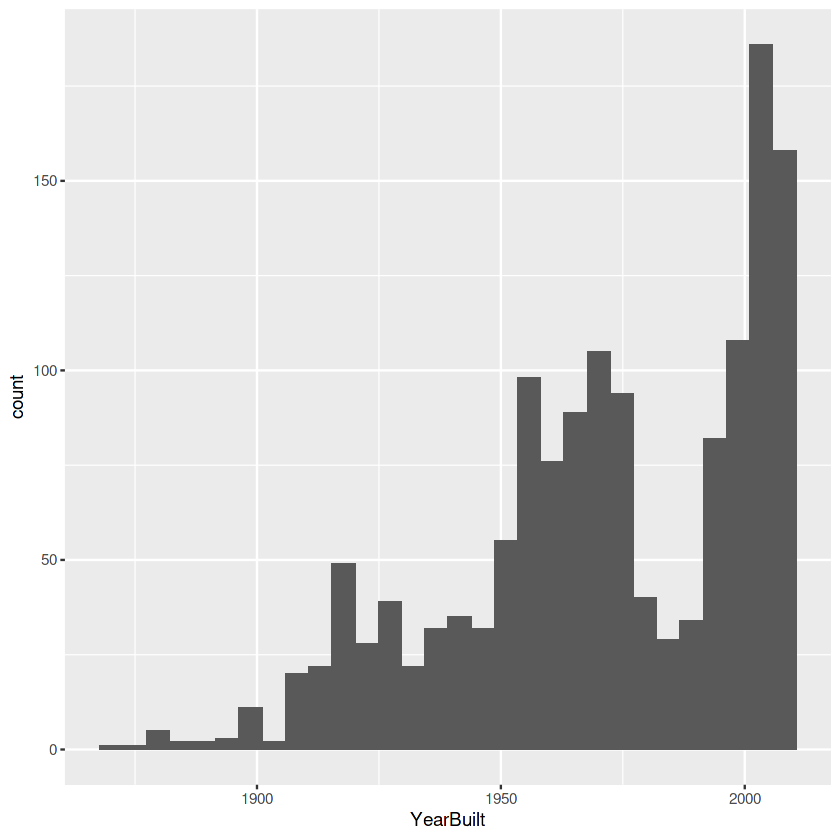

In [7]:
summary(df_train$YearBuilt)
# Year built
ggplot(df_train, aes(YearBuilt)) +
  geom_histogram()

Finally, in assessing the dependent variable SalePrice, the minimum value is 34,900 and the maximum of 755,000. I had to look it up, the dataset represents houses sold between 2006 and 2010 in Ames, Iowa. With the current housing market, I couldn't imagine a maximum house for less than one million dollars. The dataset is 11 years old, so I'll allow it. Overall, the histogram shows an almost normal distribution for the sale prices. A good sign for the later regression modeling to be performed.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



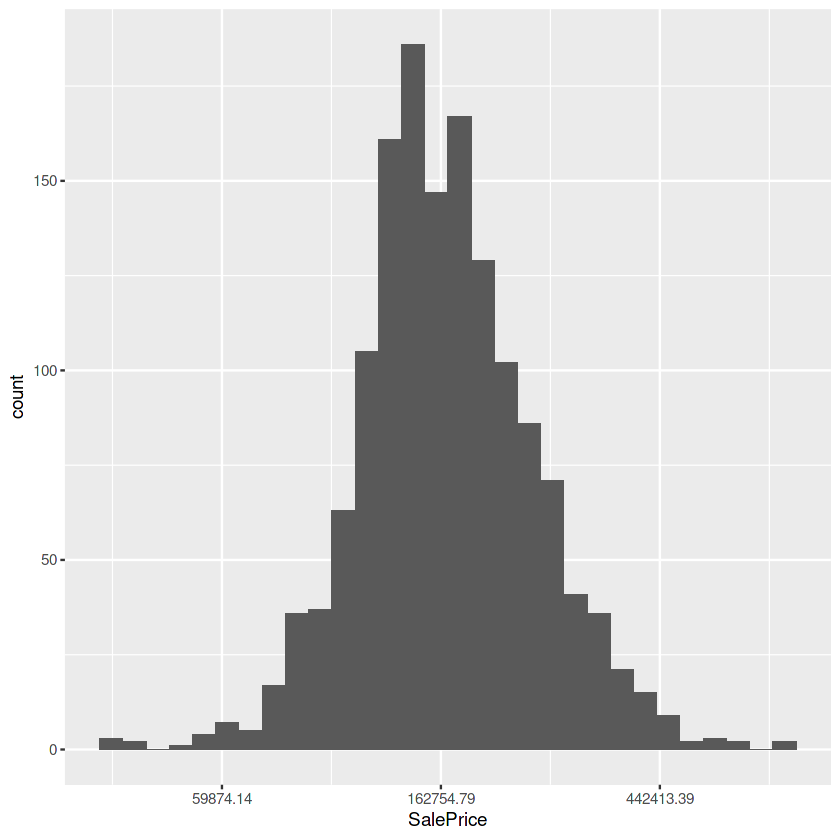

In [8]:
summary(df_train$SalePrice)
# Sale Price
ggplot(df_train, aes(SalePrice)) +
  geom_histogram() +
  scale_x_continuous(trans="log")

#### Scatterplots

Scatterplots compare the 4 selected independent variables against the dependent variable of SalePrice.

The SalePrice by LotArea scatterplot does show a positive linear relationship with the log applied to the LotArea. But visual inspection does show quite a cluster of instances, so even though the plot shows a linear relationship, this variable may not be the most valuable.

`geom_smooth()` using formula 'y ~ x'



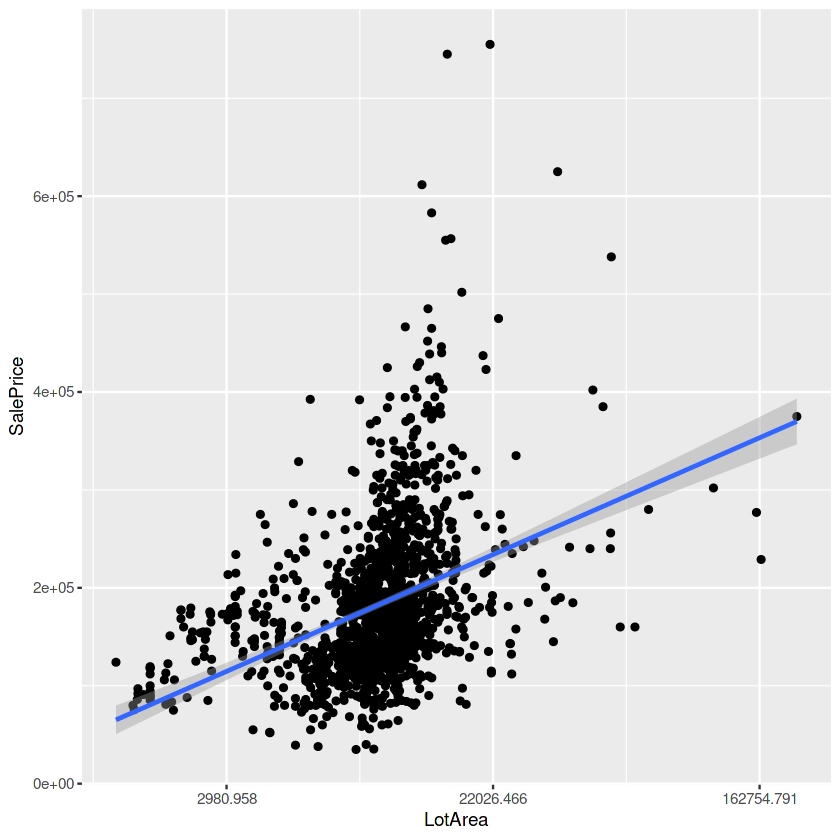

In [9]:
library(ggplot2)
ggplot(df_train, aes(x=LotArea, y=SalePrice)) + 
  geom_point() +
  scale_x_continuous(trans="log") +
  geom_smooth(method=lm)

The SalePrice by GrLivArea scatterplot shows a very clear positive linear relationship between the values with the log applied to the GrLivArea variable. Using total above ground living area as a predictor of sale prices appears to be a good hypothesis.

`geom_smooth()` using formula 'y ~ x'



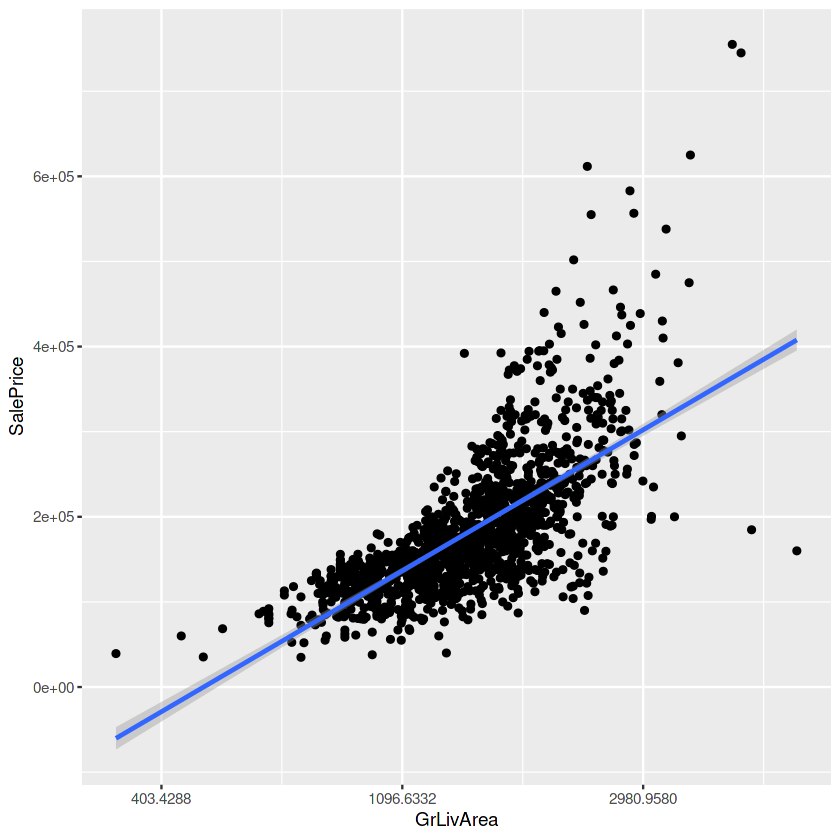

In [10]:
ggplot(df_train, aes(x=GrLivArea, y=SalePrice)) + 
  geom_point() +
  scale_x_continuous(trans="log") +
  geom_smooth(method=lm)

The SalePrice by TotRmsAbvGrd appears very similar to the above plot for GrLivArea with a positive linear relationship. I would expect the variables of TotRmsAbvGrd and GrLivArea to be highly correlated variables.

`geom_smooth()` using formula 'y ~ x'



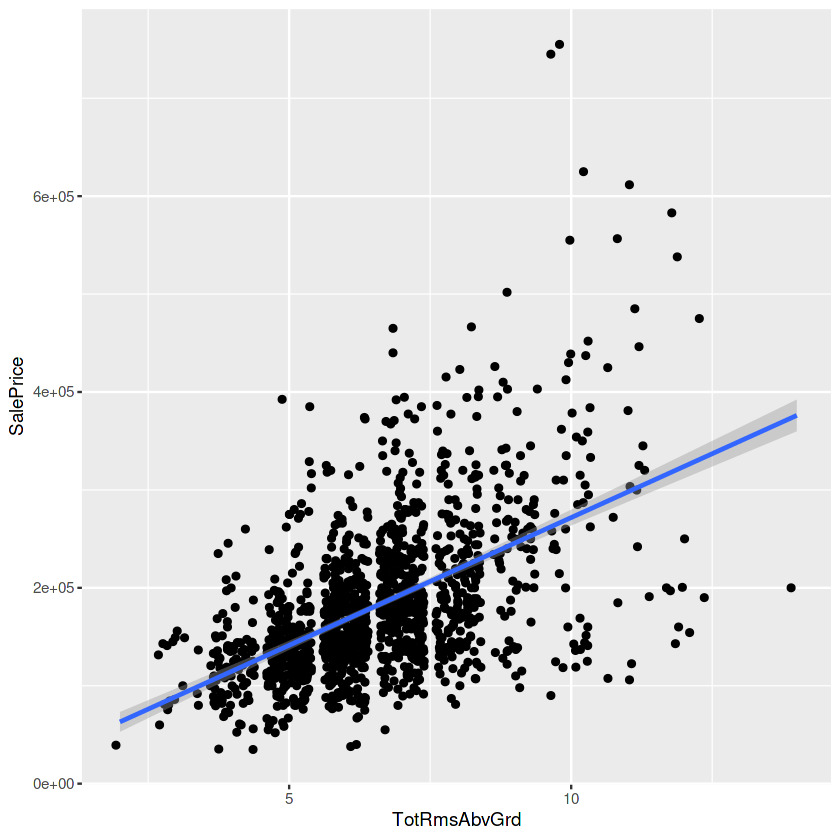

In [11]:
ggplot(df_train, aes(x=TotRmsAbvGrd, y=SalePrice)) + 
  geom_jitter() +
  geom_smooth(method=lm)

Finally, a scatterplot of SalePrice by YearBuilt show a slightly positive linear relationship with outliers more likely to appear above the linear regression line. Given the shape of the scatterplot, YearBuilt may be valuable in predicting SalePrice.

`geom_smooth()` using formula 'y ~ x'



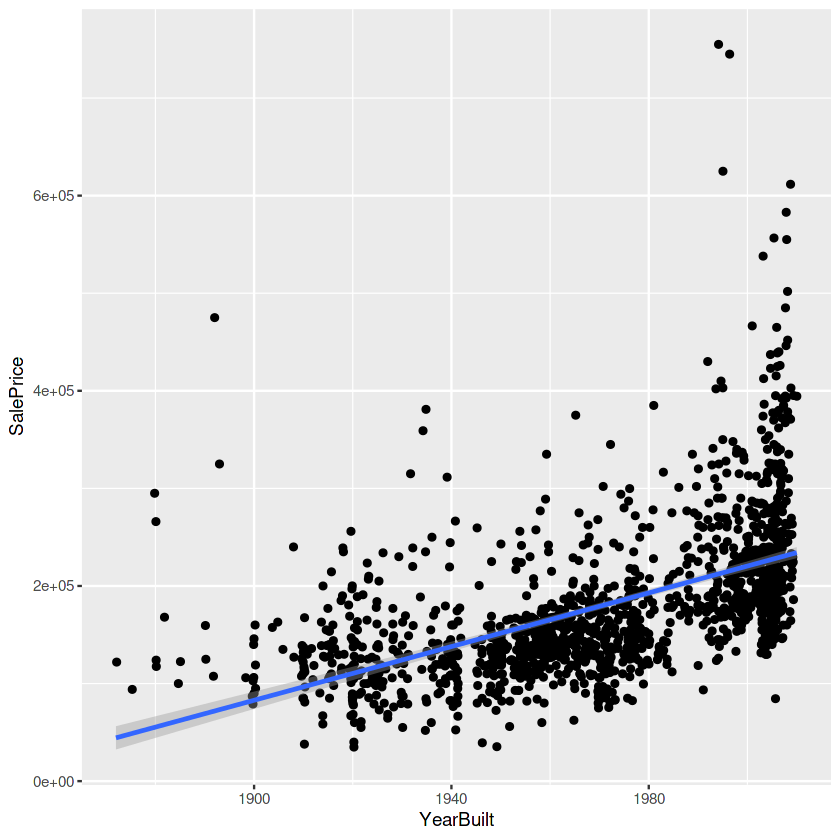

In [12]:
ggplot(df_train, aes(x=YearBuilt, y=SalePrice)) + 
  geom_jitter() +
  geom_smooth(method=lm)

#### Correlation matrix

Using 3 of the 4 selected variables above, a correlation matrix is derived with GrLivArea, LotArea, and TotRmsAbvGrd.


In [13]:
cols <- c("GrLivArea", "LotArea", "TotRmsAbvGrd")
cor.mat <- cor(df_train[cols])
cor.mat

,GrLivArea,LotArea,TotRmsAbvGrd
GrLivArea,1.0000000,0.2631162,0.8254894
LotArea,0.2631162,1.0000000,0.1900148
TotRmsAbvGrd,0.8254894,0.1900148,1.0000000


Using Pearson's algorithm for correlation, the correlation between GrLivArea and LotArea is not equal to 0, and the 80 percent confidence interval is 0.2315997 to 0.2940809. This would appear to be a moderate correlation.

In [14]:
cor.test.1 <- cor.test(df_train$GrLivArea, df_train$LotArea, method="pearson", conf.level=0.8)
cor.test.1


	Pearson's product-moment correlation

data:  df_train$GrLivArea and df_train$LotArea
t = 10.414, df = 1458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
80 percent confidence interval:
 0.2315997 0.2940809
sample estimates:
      cor 
0.2631162 


Using Pearson's algorithm for correlation, the correlation between GrLivArea and TotRmsAbvGrd is not equal to 0, and the 80 percent confidence interval is 0.8144931 to 0.8358928. As expected, this would appear to be a strong correlation.

In [15]:
cor.test.2 <- cor.test(df_train$GrLivArea, df_train$TotRmsAbvGrd, method="pearson", conf.level=0.8)
cor.test.2


	Pearson's product-moment correlation

data:  df_train$GrLivArea and df_train$TotRmsAbvGrd
t = 55.846, df = 1458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
80 percent confidence interval:
 0.8144931 0.8358928
sample estimates:
      cor 
0.8254894 


Using Pearson's algorithm for correlation, the correlation between LotArea and TotRmsAbvGrd is not equal to 0, and the 80 percent confidence interval is 0.1574573 to 0.2221597. This would appear to be a moderate to weak correlation.

In [16]:
cor.test.3 <- cor.test(df_train$LotArea, df_train$TotRmsAbvGrd, method="pearson", conf.level=0.8)
cor.test.3


	Pearson's product-moment correlation

data:  df_train$LotArea and df_train$TotRmsAbvGrd
t = 7.3901, df = 1458, p-value = 2.461e-13
alternative hypothesis: true correlation is not equal to 0
80 percent confidence interval:
 0.1574573 0.2221597
sample estimates:
      cor 
0.1900148 


As the results of the 3 correlation tests above indicate, the p-value is quite small indicating correlation between each set of variables, rejecting the null hypothesis that true correlation is zero. Given the very small values for each p-value, one should not worry about family wise error.


### Linear Algebra and Correlation

Invert your correlation matrix from above. (This is known as the precision matrix and contains variance inflation factors on the diagonal.) Multiply the correlation matrix by the precision matrix, and then multiply the precision matrix by the correlation matrix. Conduct LU decomposition on the matrix.

Create precision matrix by inverting correlation matrix.

In [17]:
# Invert your correlation matrix from above
inv.cor.mat <- solve(cor.mat)
inv.cor.mat

,GrLivArea,LotArea,TotRmsAbvGrd
GrLivArea,3.2588901,-0.35926433,-2.62191358
LotArea,-0.3592643,1.07706384,0.09191085
TotRmsAbvGrd,-2.6219136,0.09191085,3.14689738



Multiply the correlation matrix by the precision matrix. Apply the zapsmall to allow for interpretability. Results in the identity matrix.

In [18]:
# Multiply the correlation matrix by the precision matrix
cor.by.prec <- cor.mat %*% inv.cor.mat
#cor.by.prec
cor.by.prec <- zapsmall(cor.by.prec)
cor.by.prec

,GrLivArea,LotArea,TotRmsAbvGrd
GrLivArea,1,0,0
LotArea,0,1,0
TotRmsAbvGrd,0,0,1


Multiply the precision matrix by the correlation matrix, and again apply the zapsmall function. Again, results in identity matrix.

In [19]:
# multiply the precision matrix by the correlation matrix
prec.by.cor <- inv.cor.mat %*% cor.mat
#prec.by.cor
prec.by.cor <- zapsmall(prec.by.cor)
prec.by.cor

,GrLivArea,LotArea,TotRmsAbvGrd
GrLivArea,1,0,0
LotArea,0,1,0
TotRmsAbvGrd,0,0,1



Conduct LU decomposition on the matrix. Output the lower triangular matrix.

In [20]:
library(matrixcalc)
# Conduct LU decomposition on the matrix
lu.de <- lu.decomposition(cor.mat)
lower <- lu.de$L
lower

1.0000000,0.00000000,0
0.2631162,1.00000000,0
0.8254894,-0.02920681,1


In [21]:
upper <- lu.de$U
upper

1,0.2631162,0.82548937
0,0.9307699,-0.02718482
0,0.0000000,0.31777331


To confirm accuracy of LU decomposition, multiply to the lower and upper triangular matrices to return to initial correlation matrix.


In [22]:
res <- lower %*% upper
res
cor.mat

1.0000000,0.2631162,0.8254894
0.2631162,1.0000000,0.1900148
0.8254894,0.1900148,1.0000000


,GrLivArea,LotArea,TotRmsAbvGrd
GrLivArea,1.0000000,0.2631162,0.8254894
LotArea,0.2631162,1.0000000,0.1900148
TotRmsAbvGrd,0.8254894,0.1900148,1.0000000


Output the upper triangular matrix.

### Calculus-Based Probability & Statistics
Many times, it makes sense to fit a closed form distribution to data.  Select a variable in the Kaggle.com training dataset that is skewed to the right, shift it so that the minimum value is absolutely above zero if necessary.  Then load the MASS package and run $fitdistr$ to fit an exponential probability density function.  (See https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/fitdistr.html ).  Find the optimal value of $\lambda$ for this distribution, and then take 1000 samples from this exponential distribution using this value (e.g., $rexp(1000, \lambda)$).  Plot a histogram and compare it with a histogram of your original variable.   Using the exponential pdf, find the 5th and 95th percentiles using the cumulative distribution function (CDF).   Also generate a 95% confidence interval from the empirical data, assuming normality.  Finally, provide the empirical 5th percentile and 95th percentile of the data.  Discuss.

Select variable OpenPorchSF which is skewed to the right(even the lotarea is highly skewed-was able to find this by installing library called moments which has skewness function). The values are shifted by positive one to ensure that the minimum value is absolutely above zero. The shift of +1 results in the mean and median values being one greater than the initial data and no change to the standard deviation of the variable values.

The histogram of the shifted variable confirms the right skew. The summary of the shifted variable shows the minimum of 1 and the maximum of 548.

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

[1] 2.361912

[1] 12.19514

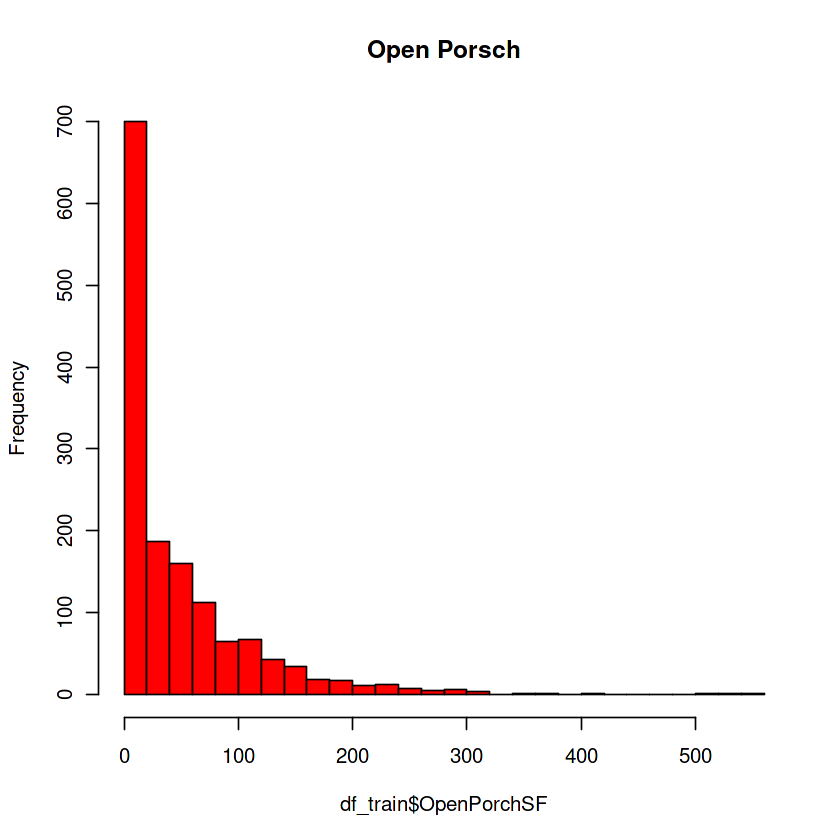

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00   26.00   47.66   69.00  548.00 

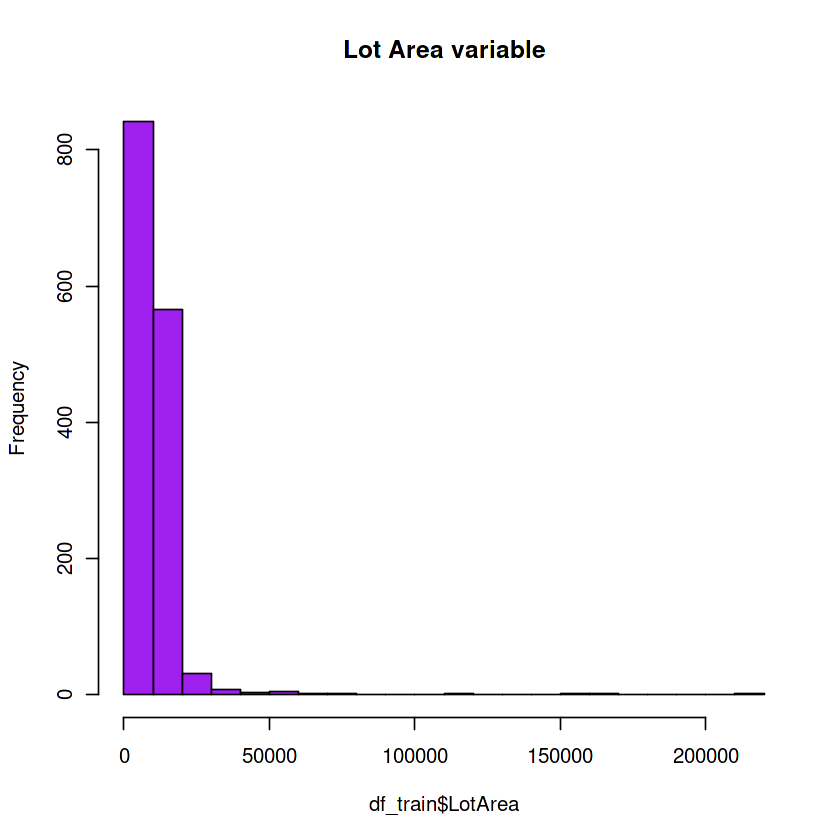

In [23]:
# Select a variable in the Kaggle.com training dataset that is skewed to the right
# OpenPorchSF
library(moments)

skewness(df_train$OpenPorchSF)
hist(df_train$OpenPorchSF, col = 'red', main = 'Open Porsch', breaks = 30)

skewness(df_train$LotArea)
hist(df_train$LotArea, col = 'purple', main = 'Lot Area variable', breaks = 30)


open.por <- df_train$OpenPorchSF
open.por <- open.por + 1
#hist(open.por)
summary(open.por)

Run function fitdistr from the MASS package to fit an exponential probability density function (PDF)

In [24]:
# Then load the MASS package and run fitdistr to fit an exponential probability density function (PDF)
library(MASS)
set.seed(1234)
exp.pdf <- fitdistr(open.por, densfun="exponential")


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




The optimal value of lambda for the distribution is the estimate attribute from the fitdistr response. The value is output below.


In [25]:
# Find the optimal value of lambda for this distribution
exp.pdf$estimate
lambda <- exp.pdf$estimate

rate 
0.02098183

Generate 1000 samples using the lambda value.

In [26]:
# then take 1000 samples from this exponential distribution using this value
samples <- rexp(1000, lambda)

The below histogram based on the 1000 samples shows a decreased range of values across the x-axis along with a less concentrated count along the y-axis. Yes, the new histogram is still right skewed, but not to same the degree. From visual inspection, the second bucket of the below histogram is much closer to half of the first bucket as compared to the initial histogram. Overall the data is a bit more uniformly distributed, though not all completely uniform, nor normal, and the range of values has decreased by almost half.

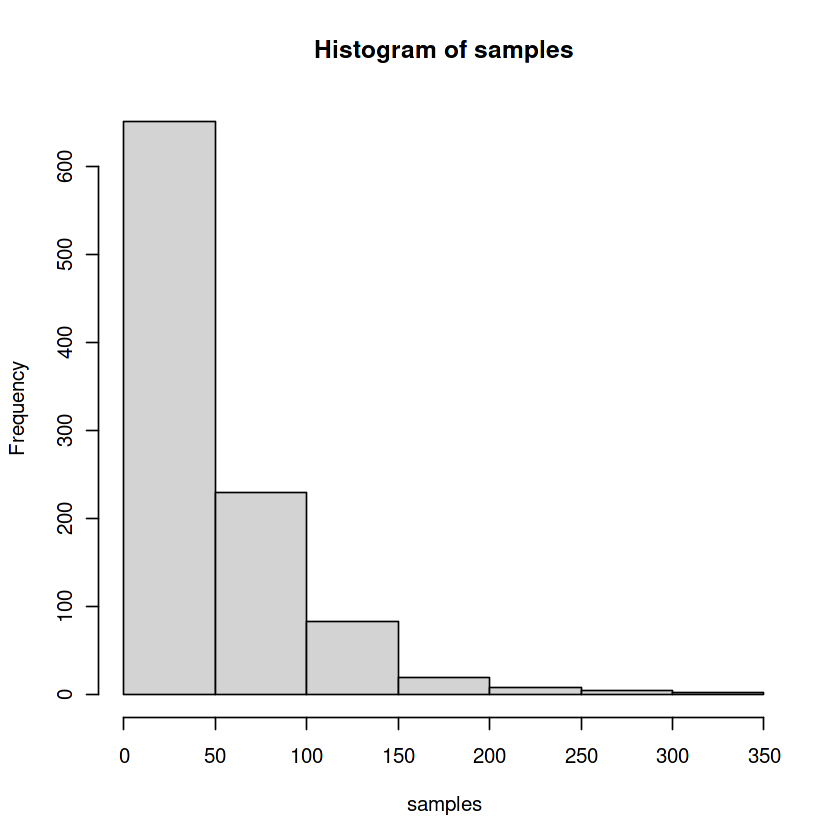

In [27]:
# Plot a histogram and compare it with a histogram of your original variable.
hist(samples)

Given the lambda of the exponential PDF, the 5th percentile is 2.444652 and the 95th percentile is 142.7774.

In [28]:
# Using the exponential pdf, find the 5th and 95th percentiles using the cumulative distribution function
qexp(.05, rate=lambda, lower.tail=T)
qexp(.95, rate=lambda, lower.tail=T)

[1] 2.444652

[1] 142.7774

Using the initial data, generating the 95% confidence interval assuming normality using the function qnorm along with the t.test function. For function qnorm the 95% confidence interval would be 44.2617 to 51.05885, quite close to result from t.test.

In [29]:
# Generate a 95% confidence interval from the empirical data, assuming normality.
mean <- mean(open.por)
sd <- sd(open.por)
error <- qnorm(0.975)*sd/sqrt(length(open.por))
left <- mean - error
right <- mean + error
left
right
t.test(open.por)

[1] 44.2617

[1] 51.05885


	One Sample t-test

data:  open.por
t = 27.486, df = 1459, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 44.25888 51.06167
sample estimates:
mean of x 
 47.66027 


The 5th percentile for the shifted empirical data is 1.00 and the 95th percentile is 176.05. Much different compared to the 95% confidence interval if the data were normal. With the exponential distribution, the skewed data provided realistic results while the normal data clearly did not match the skew of the original variable values.


In [30]:
# Provide the empirical 5th percentile and 95th percentile of the data.
quantile(open.por, c(0.05, 0.95))

5%    95% 
  1.00 176.05

### Modeling

Build some type of multiple regression model and submit your model to the competition board. Provide your complete model summary and results with analysis.  Report your Kaggle.com user name and score.

##### Approach

To find the best multiple regression model, I used an abbreviated backward elimination step approach. I started with every variable and upon the first model, removed all the variables with a significance greater than 0 and less than 0.001. Then, I continued to remove all variables that did not meet the same significance criteria until all independent variables had the same significance. But, for the final model below, I did add the variable Neighborhood back into the model as an attempt to improve my score, which did it. In the end, the below model sure isn't the simplest model, but fared well according to my standards and did pare down the overall list of variables.

To prepare the training and test data, I did convert all character variables to factor data type and set all missing numeric entries to zero, except for missing GarageYrBlt in which I just use the YearBuilt value as a replacement. As noted below, the test dataset had many more columns with missing data requiring data imputation

In [31]:
# First submitted to Kaggle
# Adjusted R-squared:  0.5018
# Naive approach based soly on the ground living area
#mod_lm <- lm(SalePrice ~ GrLivArea, data=df_train)
# Read in Train and Test again
df_train <- read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test <- read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
# For Train
df_train$LotFrontage <- replace(df_train$LotFrontage, is.na(df_train$LotFrontage), 0)
df_train$MasVnrArea <- replace(df_train$MasVnrArea, is.na(df_train$MasVnrArea), 0)
df_train$GarageYrBlt <- replace(df_train$GarageYrBlt, is.na(df_train$GarageYrBlt), df_train$YearBuilt)
# For Test
df_test$LotFrontage <- replace(df_test$LotFrontage, is.na(df_test$LotFrontage), 0)
df_test$MasVnrArea <- replace(df_test$MasVnrArea, is.na(df_test$MasVnrArea), 0)
df_test$BsmtFinSF1 <- replace(df_test$BsmtFinSF1, is.na(df_test$BsmtFinSF1), 0)
df_test$BsmtFinSF2 <- replace(df_test$BsmtFinSF2, is.na(df_test$BsmtFinSF2), 0)
df_test$BsmtUnfSF <- replace(df_test$BsmtUnfSF, is.na(df_test$BsmtUnfSF), 0)
df_test$TotalBsmtSF <- replace(df_test$TotalBsmtSF, is.na(df_test$TotalBsmtSF), 0)
df_test$BsmtFullBath <- replace(df_test$BsmtFullBath, is.na(df_test$BsmtFullBath), 0)
df_test$BsmtHalfBath <- replace(df_test$BsmtHalfBath, is.na(df_test$BsmtHalfBath), 0)
df_test$GarageCars <- replace(df_test$GarageCars, is.na(df_test$GarageCars), 0)
df_test$GarageArea <- replace(df_test$GarageArea, is.na(df_test$GarageArea), 0)
df_test$GarageYrBlt <- replace(df_test$GarageYrBlt, is.na(df_test$GarageYrBlt), df_test$YearBuilt)
# Convert all character fields to factor
df_train[is.na(df_train)] <- "Not Found"
df_train <- df_train %>% mutate_if(is.character,as.factor)
df_test[is.na(df_test)] <- "Not Found"
df_test <- df_test %>% mutate_if(is.character,as.factor)
df_test$KitchenQual[df_test$KitchenQual == "Not Found"] <- "TA"
#mod_lm.all <- lm(SalePrice ~ ., data=df_train)
# Adjusted R-squared:  0.9192
#mod_lm <- lm(SalePrice ~ LotArea + LandSlope + Neighborhood + Condition1 + Condition2 + OverallQual + OverallCond + RoofMatl + MasVnrArea + ExterQual + BsmtQual + BsmtExposure + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + `1stFlrSF` + `2ndFlrSF` + KitchenQual, data=df_train)
# Adjusted R-squared:  0.8914
#submission.csv
# Kaggle score: 0.16268 (Best score)
# mod_lm <- lm(SalePrice ~ LotArea + LandSlope + Neighborhood + OverallQual + OverallCond + RoofMatl + ExterQual + BsmtQual + BsmtExposure + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + `1stFlrSF` + `2ndFlrSF` + KitchenQual, data=df_train)
# Adjusted R-squared:  0.8802

Rows: 1460 Columns: 81

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1459 Columns: 80

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (37): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Warning message in x[list] <- values:
“number of items to replace is not a multiple of replacement length”
Warning message in 

The above commented out models were used during the development, but for the final model summary were not selected even though my best Kaggle score is noted in one of the models above.

Based on the final model formula, I wanted to check the correlation between all the numeric values. Overall, the correlation values are near zero except for BsmtUnfSF and BsmtFinSF1, which score a correlation of -0.5. Based on the low correlation of all the variables below, they are included in the final formula.


,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF
LotArea,1.0,0.2,0.1,0.0,0.3,0.1
BsmtFinSF1,0.2,1.0,-0.1,-0.5,0.4,-0.1
BsmtFinSF2,0.1,-0.1,1.0,-0.2,0.1,-0.1
BsmtUnfSF,0.0,-0.5,-0.2,1.0,0.3,0.0
1stFlrSF,0.3,0.4,0.1,0.3,1.0,-0.2
2ndFlrSF,0.1,-0.1,-0.1,0.0,-0.2,1.0


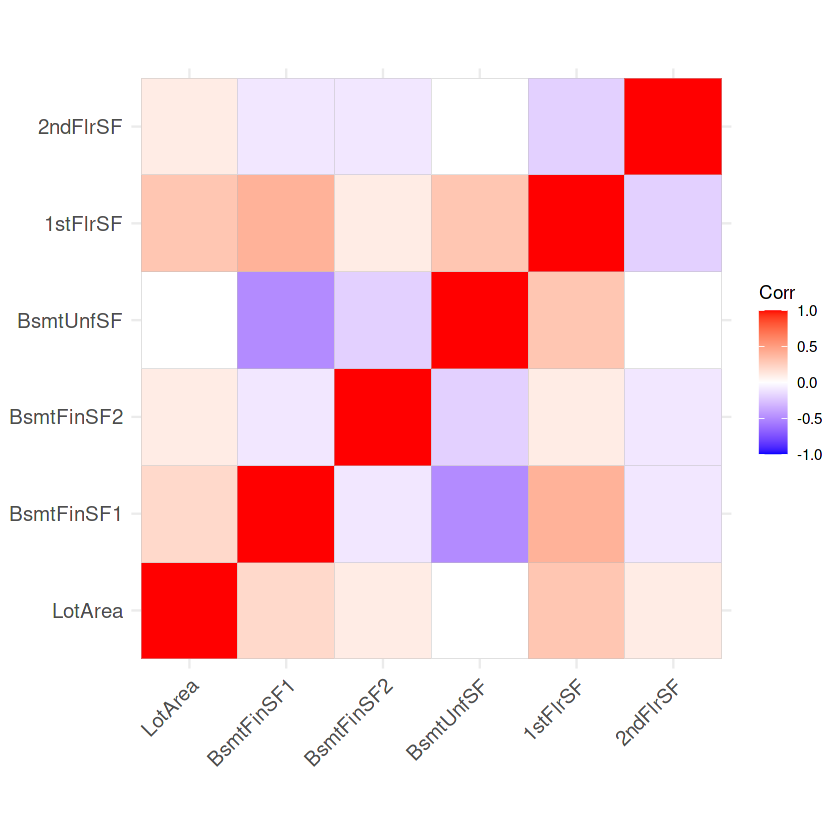

In [32]:
library(dplyr)
library(ggcorrplot)
df_train.abbr <- df_train %>% dplyr::select(LotArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, `1stFlrSF`, `2ndFlrSF`)
corr <- round(cor(df_train.abbr), 1)
head(corr)
ggcorrplot(corr)

The final linear regression model is generated and displayed in summary. The model contains both numeric and factor variables. As the model summary shows, the factor variables are converted into dummy variables by the lm function.

In [33]:
mod_lm <- lm(SalePrice ~ Neighborhood + LotArea + OverallQual + OverallCond + RoofMatl + ExterQual + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + `1stFlrSF` + `2ndFlrSF` + KitchenQual, data=df_train)
# Adjusted R-squared:  0.8664
summary(mod_lm)


Call:
lm(formula = SalePrice ~ Neighborhood + LotArea + OverallQual + 
    OverallCond + RoofMatl + ExterQual + BsmtFinSF1 + BsmtFinSF2 + 
    BsmtUnfSF + `1stFlrSF` + `2ndFlrSF` + KitchenQual, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-362426  -12603    -143   12599  207530 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.524e+05  3.562e+04 -15.509  < 2e-16 ***
NeighborhoodBlueste -1.816e+04  2.206e+04  -0.823 0.410471    
NeighborhoodBrDale  -3.018e+04  1.064e+04  -2.835 0.004642 ** 
NeighborhoodBrkSide -1.715e+04  8.597e+03  -1.995 0.046247 *  
NeighborhoodClearCr -1.037e+04  9.791e+03  -1.059 0.289868    
NeighborhoodCollgCr  3.134e+03  7.570e+03   0.414 0.678951    
NeighborhoodCrawfor  2.663e+02  8.605e+03   0.031 0.975311    
NeighborhoodEdwards -2.491e+04  8.162e+03  -3.052 0.002312 ** 
NeighborhoodGilbert  5.086e+03  8.071e+03   0.630 0.528674    
NeighborhoodIDOTRR  -2.940e+04  9.105e+03  -3.229

Assessing the residuals: With a goal of matching a normal distribution, the median isn't quite at 0, so the center of the distribution is off. The 1st and 3rd quartile are almost the same, so a good sign for the normal nature. The min and max values are not close, but given the large range, I do believe they are similar in magnitude.

Assessing the standard error and the corresponding t-value: Except for many of the Neighborhood dummy variables, the results show good t-values with absolute values of at least 5. The p-value reflects the same understanding as the t-value. The p-value of all the variables expect for some of the Neighborhood dummy variables indicate a high level of significance to the model.

The Adjusted R-squared value of 0.8664 indicates the model can explain over 86% of the data's variation.

Just for the sake of completeness, I did attempt to use the stepAIC function, but the result was not better than the final model presented.

In [34]:
# DO NOT RUN, THIS HAS STEPAIC, NOT WORTH IT
mod_lm.all <- lm(SalePrice ~ ., data=df_train)
mod_lm.aic <- stepAIC(mod_lm.all, direction="both")
summary(mod_lm.aic)

Start:  AIC=29501.75
SalePrice ~ Id + MSSubClass + MSZoning + LotFrontage + LotArea + 
    Street + Alley + LotShape + LandContour + Utilities + LotConfig + 
    LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + 
    HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + 
    RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + 
    MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + 
    BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + 
    BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + 
    CentralAir + Electrical + `1stFlrSF` + `2ndFlrSF` + LowQualFinSF + 
    GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + 
    GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + 
    PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + `3SsnPorch` + 
 


Call:
lm(formula = SalePrice ~ MSSubClass + MSZoning + LotArea + Street + 
    LandContour + LotConfig + LandSlope + Neighborhood + Condition1 + 
    Condition2 + BldgType + OverallQual + OverallCond + YearBuilt + 
    YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + MasVnrArea + 
    ExterQual + BsmtQual + BsmtCond + BsmtExposure + BsmtFinSF1 + 
    BsmtFinSF2 + BsmtUnfSF + `1stFlrSF` + `2ndFlrSF` + BsmtFullBath + 
    FullBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + GarageCars + GarageArea + GarageQual + 
    GarageCond + WoodDeckSF + ScreenPorch + PoolArea + PoolQC + 
    Fence + MoSold + SaleCondition, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-177027   -9141     157    9783  177027 

Coefficients: (2 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.735e+06  1.670e+05 -10.389  < 2e-16 ***
MSSubClass            -9.576e+01 

The residuals plot shows most of the points along the zero x-axis, a good sign.

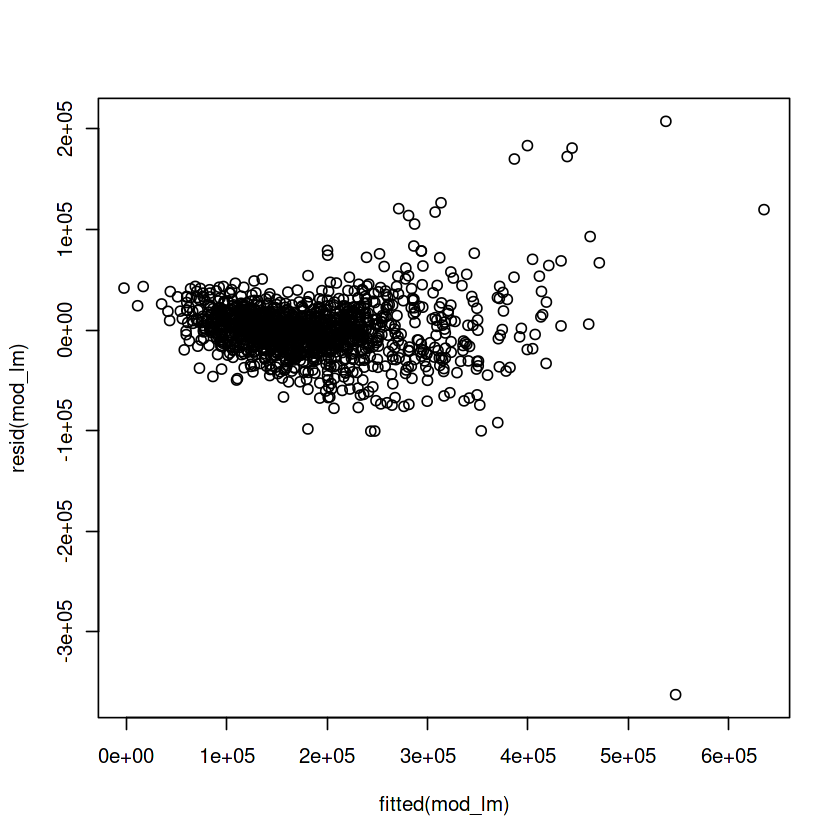

In [35]:
plot(fitted(mod_lm),resid(mod_lm))

The normal Q-Q plot does indicate points diverging a bit at the two ends. Certainly, a better model exists, but the Normal Q-Q plot shows most of the points on or near the straight line.

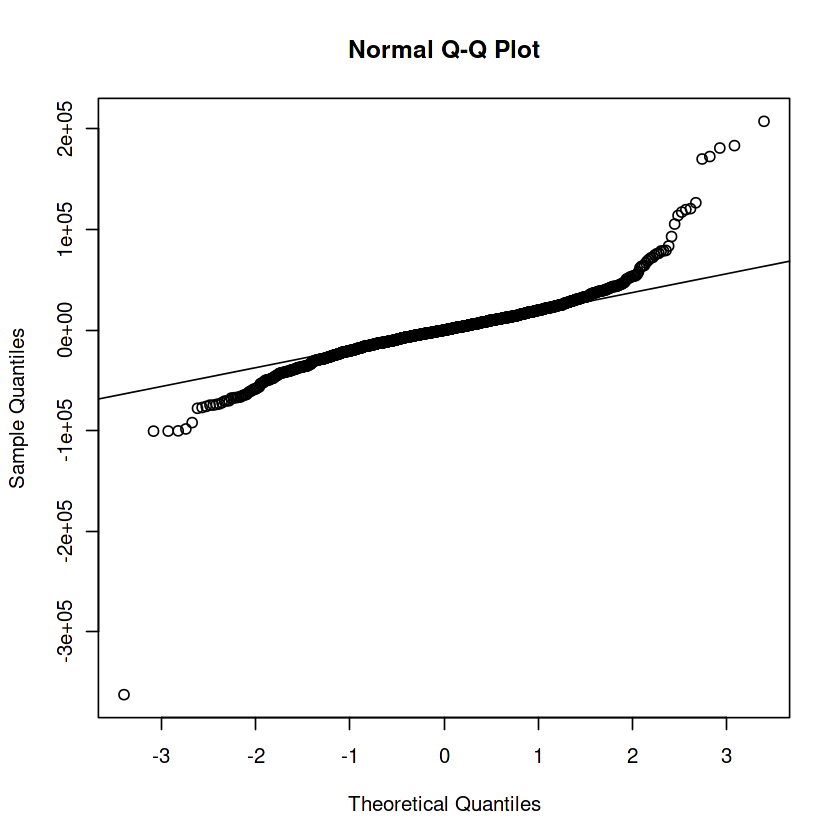

In [36]:
qqnorm(resid(mod_lm))
qqline(resid(mod_lm))

Finally, the predictions are made with the test dataset based on the final regression model.


In [37]:
preds <- predict(mod_lm, newdata=df_test)

In [38]:

submission <- data.frame(Id=df_test$Id, SalePrice=preds)
print(head(submission));
submission %>% write_csv("submission.csv")


    Id SalePrice
1 1461  114996.1
2 1462  177426.4
3 1463  181366.7
4 1464  197444.8
5 1465  238047.8
6 1466  170229.3


#kaggle.com username: deepyath (link: https://www.kaggle.com/deepyath)

#Top score: 0.16268 (Above model score: 0.17720)